# **Tim 17**


1.   Muhammad Akmal Falah
2.   Rafly Al Hakim
3.   Putri Danty Apriani
4.   Thesa Permatasari Djaka
5.   Jeremia Ricardt Gultom


# **Deskripsi Problem**
Lembaga keuangan seperti bank dan perusahaan pemberi pinjaman menghadapi tantangan besar dalam menilai apakah seorang nasabah layak mendapatkan pinjaman atau tidak. Keputusan ini sangat penting karena berpengaruh pada risiko kredit yang diambil oleh lembaga keuangan. Risiko kredit yang tinggi dapat menyebabkan kerugian finansial yang signifikan jika nasabah gagal membayar kembali pinjamannya. Oleh karena itu, diperlukan metode yang efektif dan akurat untuk memprediksi kelayakan kredit nasabah. Tujuan dari proyek ini adalah membangun model prediksi yang dapat membantu lembaga keuangan dalam memutuskan apakah akan memberikan pinjaman kepada seorang nasabah atau tidak. Model ini akan menggunakan data historis nasabah dan berbagai fitur relevan untuk memprediksi kelayakan kredit nasabah.

# **Deskripsi Singkat Solusi AI/ML**
Solusi machine learning untuk prediksi kelayakan kredit nasabah adalah sebuah proses yang sistematis. Langkah-langkah utamanya termasuk pengumpulan data historis nasabah dan atribut terkait, serta pembersihan dan pemrosesan data untuk mempersiapkannya untuk analisis. Selanjutnya, pemilihan fitur yang relevan dan pembagian data menjadi dua bagian: data latih untuk melatih model dan data uji untuk menguji kinerjanya. Setelah itu, model machine learning dipilih dan dilatih menggunakan data latih, dan kemudian dievaluasi dengan menggunakan data uji untuk mengukur kinerjanya. Evaluasi menggunakan metrik akurasi model, yang menunjukkan seberapa baik model memprediksi kelayakan kredit dengan benar.

# **Exploratory Data Analysis (EDA)**

In [1]:
pip install pgeocode

In [2]:
pip install pandas numpy xgboost


In [3]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import library yang akan digunakan

In [4]:
%matplotlib inline
## General Libraries and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.gridspec as gridspec
import warnings
import pgeocode
warnings.filterwarnings('ignore')
## Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score

Import dan baca data yang digunakan

In [5]:
df = pd.DataFrame(pd.read_csv('Bank_Loan_Granting.csv'))
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91107       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

Cek informasi dataset

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


Terdapat 14 kolom dan 5000 baris data. Untuk 13 kolom yaitu :

ID : ID pelanggan

Age : usia pelanggan

Experience : jumlah tahun pengalaman pelanggan

Income : pendapatan tahunan pelanggan

ZIP Code : kode pos lokasi pelanggan

Family : jumlah orang dalam keluarga pelanggan

CCAvg : rata-rata pembelanjaan kartu kredit bulanan

Education : tingkat Pendidikan pelanggan (undergraduate, graguate, professional)

Mortgage : Nilai hipotek nasabah (barang yang dijadikan jaminan oleh nasabah kepada bank)

Personal Loan : nasabah diberikan pinjaman atau tidak

Securities Account: nasabah memiliki rekening keamanan atau tidak (disebut juga rekening investasi)

CD Account : nasabah mempunyai rekening CD atau tidak (sejenis rekening tabungan yang memungkinkan nasabah memperoleh bunga atas sejumlah uang tetap untuk jangka waktu tertentu)

Online : nasabah menggunakan layanan online bank atau tidak

CreditCard : nasabah menggunakan kartu kredit bank atau tidak

In [7]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Pada data tersebut tidak terdapat data yang hilang

Selanjutnya mengganti tipe data dari fitur CCAvg yang semula bertipe data objek menjadi tipe data float

In [8]:
df['CCAvg'] = df['CCAvg'].str.replace("/" , '.').astype(np.float64)
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

Dapat di cek sekarang fitur CCAvg bertipe data float

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

Seperti yang ditunjukkan dalam describe, ada nilai negatif dalam fitur 'Experience'. Karena Experience adalah beberapa tahun, maka tidak boleh negatif dan harus benar.

Selanjutnya mengubah nilai negatif pada fitur 'Experience' dengan Nilai Absolutnya

In [11]:
df['Experience'] = df['Experience'].abs()
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.134600    73.774200  93152.503000   
std    1443.520003    11.463166    11.415189    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

Setelah itu, mengubah Income (Pendapatan) tahunan menjadi Pendapatan bulanan

 Income (Pendapatan) adalah pendapatan 'tahunan' dan CCAvg adalah uang belanja 'bulanan'. Maka, akan disamakan rentang waktu pendapatan menjadi bulanan dengan membaginya dengan 12.

In [12]:
df['Income'] = df['Income']/12
df

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1  4.083333     91107       4    1.6          1   
1        2   45          19  2.833333     90089       3    1.5          1   
2        3   39          15  0.916667     94720       1    1.0          1   
3        4   35           9  8.333333     94112       1    2.7          2   
4        5   35           8  3.750000     91330       4    1.0          2   
...    ...  ...         ...       ...       ...     ...    ...        ...   
4995  4996   29           3  3.333333     92697       1    1.9          3   
4996  4997   30           4  1.250000     92037       4    0.4          1   
4997  4998   63          39  2.000000     93023       2    0.3          3   
4998  4999   65          40  4.083333     90034       3    0.5          2   
4999  5000   28           4  6.916667     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

Selanjutnya menghapus fitur yang tidak berguna yaitu fitur ID

In [13]:
df = df.drop(['ID'],axis=1)
df

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1  4.083333     91107       4    1.6          1         0   
1      45          19  2.833333     90089       3    1.5          1         0   
2      39          15  0.916667     94720       1    1.0          1         0   
3      35           9  8.333333     94112       1    2.7          2         0   
4      35           8  3.750000     91330       4    1.0          2         0   
...   ...         ...       ...       ...     ...    ...        ...       ...   
4995   29           3  3.333333     92697       1    1.9          3         0   
4996   30           4  1.250000     92037       4    0.4          1        85   
4997   63          39  2.000000     93023       2    0.3          3         0   
4998   65          40  4.083333     90034       3    0.5          2         0   
4999   28           4  6.916667     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

The Target Overview

Fitur yang ditargetkan yaitu fitur 'Personal Loan'

************************************************************************************************************************
number of customers :  5000
The number of Personal Loan = 0 :  4520
The number of Personal Loan = 1 :  480
************************************************************************************************************************


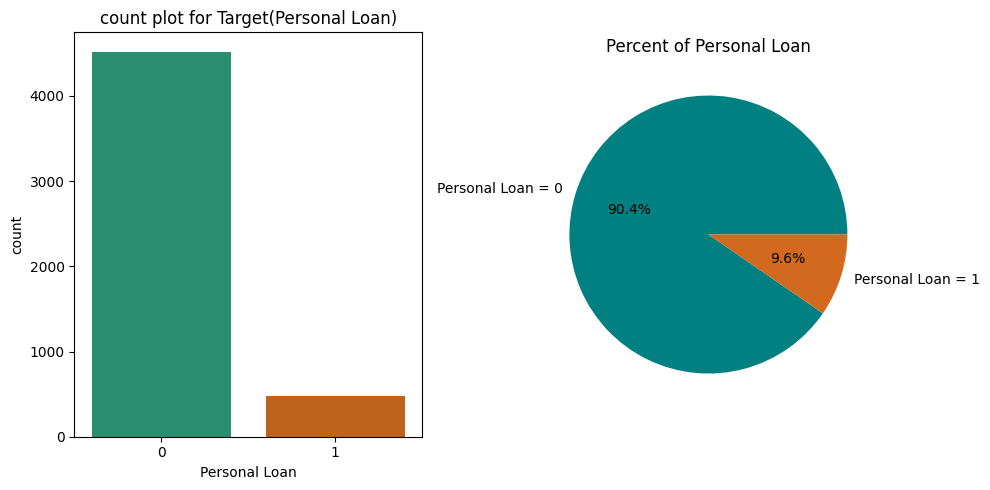

In [14]:
print('*'*120)
print('number of customers : ',df.shape[0])
print('The number of Personal Loan = 0 : ',df['Personal Loan'].value_counts()[0])
print('The number of Personal Loan = 1 : ',df['Personal Loan'].value_counts()[1])
print('*'*120)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Personal Loan',palette = "Dark2")
plt.title("count plot for Target(Personal Loan)")
plt.subplot(1,2,2)
plt.pie([df['Personal Loan'].value_counts()[0],df['Personal Loan'].value_counts()[1]],
        labels=['Personal Loan = 0','Personal Loan = 1'],autopct='%1.1f%%',colors=['teal','chocolate'])
plt.title("Percent of Personal Loan")
plt.tight_layout()
plt.show()

Dapat dilihat pada grafik mayoritas paling banyak adalah kelas 0 dengan 90,4% pelanggan dan minoritas adalah kelas 1 dengan 9,6% pelanggan.

Ada beberapa fitur descrete dan beberapa fitur continues dalam dataset

Untuk fitur 'ZIP Code' adalah fitur diskrit atau kategorikal. Karena kategorinya banyak, kami menganalisisnya secara terpisah.

In [15]:
descrete_col = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]
continuous_col = df[['Age','Experience','Income','CCAvg','Mortgage']]

Family :  [4 3 1 2]
Education :  [1 2 3]
Securities Account :  [1 0]
CD Account :  [0 1]
Online :  [0 1]
CreditCard :  [0 1]


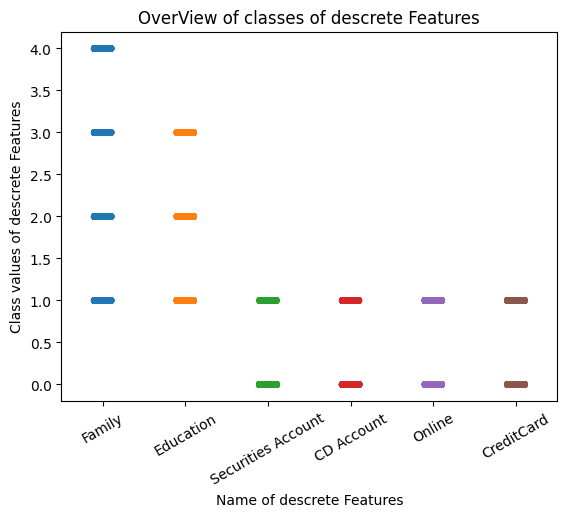

In [16]:
for col in descrete_col :
    print('%s : ' %col , df[col].unique())

ax = sns.stripplot(data=descrete_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Class values of descrete Features')
plt.xlabel('Name of descrete Features')
plt.title('OverView of classes of descrete Features')
plt.show()

Dapat dilihat pada gambar diatas terdapat 7 fitur yang bersifat diskrit

- Family merupakan fitur multinomial dan dapat terdiri dari minimal 1 orang dan paling banyak 4 orang : [1,2,3,4]
- Education adalah fitur multinomial lainnya dan dapat dalam 3 level : [1,2,3]
- 4 fitur sisanya adalah fitur biner dan 0/1 berarti Tidak/Ya



************************************************************************************************************************


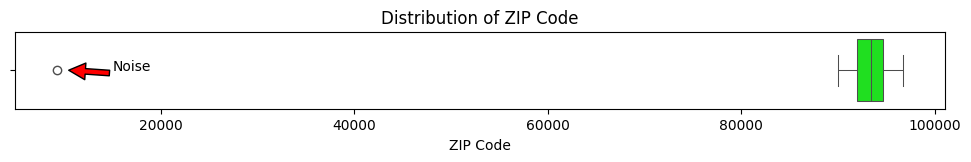

The number of categories in ZIP Code is :  467
There is a noise in zipcode feature, it is the smallest value of it :


ZIP Code
384       9307
652      90005
1469     90005

The range of ZIP Code without this noise is : (90005 , 96651)


In [17]:
print('\n')
print('*'*120)

plt.figure(figsize=(12,1))
ax = sns.boxplot(x=df['ZIP Code'],color="lime", linewidth=.75)
plt.annotate('Noise',xy=(10500,0),xytext=(15000,0),arrowprops=dict(facecolor='red'))
ax.set_title('Distribution of ZIP Code')
plt.show()
###############################################################################
fig = px.strip(df[df["ZIP Code"]>80000],
         x="Personal Loan",
         y="ZIP Code",
         stripmode='overlay')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=96900,
            text="ZIP Codes 96651 Must Be Checked\n for analysis",
            textangle=0,
            ax=150,
            ay=-50,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1)])

fig.show()
#################################################################################
print('The number of categories in ZIP Code is : ',len(df['ZIP Code'].unique()))
print('There is a noise in zipcode feature, it is the smallest value of it :')
display(df['ZIP Code'].nsmallest(3).to_frame())
print('The range of ZIP Code without this noise is : (%d , %d)'%(df[df['ZIP Code']>80000]['ZIP Code'].min(),
                                           df[df['ZIP Code']>80000]['ZIP Code'].max()))

- Dapat dilihat pada box plot, nilai terkecil ZIP Code adalah angka yang terdiri dari 4 digit, namun sisanya 5 digit.
- ZIP Code berada dalam kisaran batas (90005,96651), tetapi titik ini berada di luar kisaran ini dan sangat jauh dari itu.
- Selain itu, diketahui dari pencarian di internet bahwa kode ini tidak valid karena kode pos di Amerika memiliki 5 digit atau 9 digit. Jadi titik ini adalah sebuah noise.

- Pada stripplot terlihat bahwa nilai Personal Loan untuk ZIP Code apa pun bisa 0 dan 1, kecuali kode pos 96561 yang seluruh nilai Personal Loan adalah 0. Artinya nilai Personal Loan tidak bergantung pada ZIP Code.

count       mean         std        min    25%        50%  \
Age         5000.0  45.338400   11.463166  23.000000  35.00  45.000000   
Experience  5000.0  20.134600   11.415189   0.000000  10.00  20.000000   
Income      5000.0   6.147850    3.836144   0.666667   3.25   5.333333   
CCAvg       5000.0   1.937938    1.747659   0.000000   0.70   1.500000   
Mortgage    5000.0  56.498800  101.713802   0.000000   0.00   0.000000   

                   75%         max  
Age          55.000000   67.000000  
Experience   30.000000   43.000000  
Income        8.166667   18.666667  
CCAvg         2.500000   10.000000  
Mortgage    101.000000  635.000000

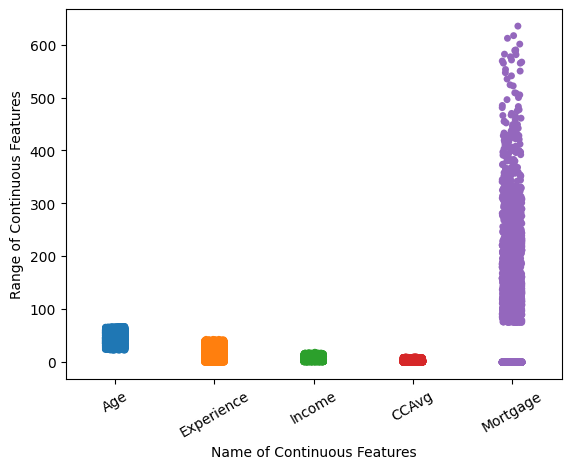

In [18]:
display(continuous_col.describe().T)
ax = sns.stripplot(data=continuous_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Range of Continuous Features')
plt.xlabel('Name of Continuous Features')
plt.show()


Terdapat 5 fitur continuous
- Age pelanggan dalam kisaran (23-67)
- Pelanggan mempunyai experience paling banyak 43 tahun
- Income berada pada kisaran (0,67-18,66) bulanan
- Nilai CCAvg maksimal 10
- seperti terlihat diatas tidak ada Mortgage antara 0 sampai 75, nilainya 0 atau berada pada range (75,635), juga kita dapat melihat nilai terbanyak berada pada range (75,400)


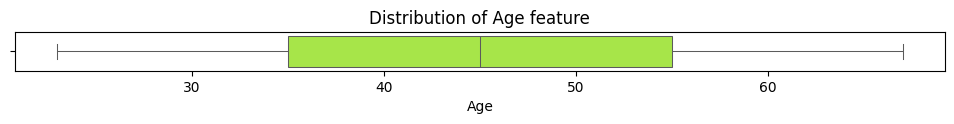

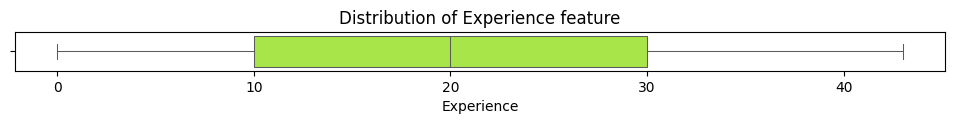

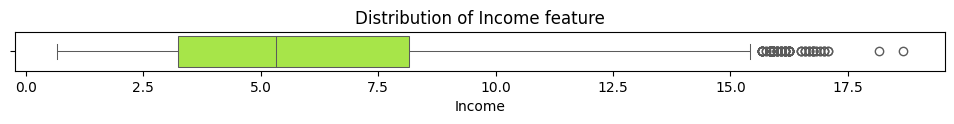

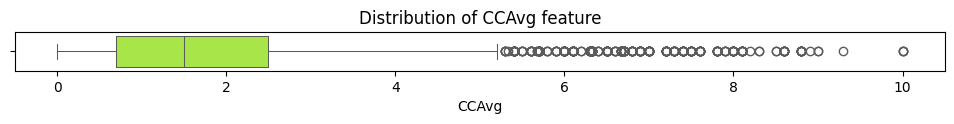

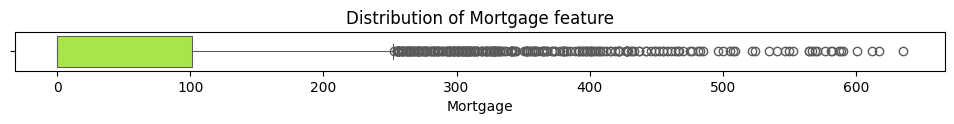

In [19]:
for col in continuous_col.columns:
    plt.figure(figsize=(12,0.5))
    ax = sns.boxplot(x=df[col],color="greenyellow", linewidth=.75)
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

- Seperti yang ditunjukkan pada box plot, pada dua fitur, Age dan Experience, sebaran datanya normal;
- Fitur lain, kami melihat beberapa outlier. Karena menyangkut jumlah uang atau nilai mortgage, jumlahnya bisa berapa pun, dan semuanya masuk akal, jadi tidak bisa menjadi noises.

# **Data Cleaning**

- Seperti disebutkan di atas, kolom ZIP Code tidak memiliki pengaruh yang signifikan dalam menentukan Personal Loan dan kami dapat menghapusnya dari dataset kami untuk pemodelan, namun kami memerlukannya untuk visualisasi dan mengekstraksi beberapa informasi.

- Jadi, kita membuat salinan kumpulan data bersih akhir (df) bernama df1, menghilangkan noise darinya, dan memasukkan kolom penting (seperti garis lintang, garis bujur, dan sebagainya) ke dalamnya. Terakhir, kami menghapus kolom ZIP Code dari data bersih (df) untuk pemodelan kami.

df is final clean data

In [20]:
df1 = df.copy()
df = df.drop(['ZIP Code'],axis=1)
df1.drop(index=384,inplace=True)
df1.reset_index(drop=True, inplace =True)
df1

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1  4.083333     91107       4    1.6          1         0   
1      45          19  2.833333     90089       3    1.5          1         0   
2      39          15  0.916667     94720       1    1.0          1         0   
3      35           9  8.333333     94112       1    2.7          2         0   
4      35           8  3.750000     91330       4    1.0          2         0   
...   ...         ...       ...       ...     ...    ...        ...       ...   
4994   29           3  3.333333     92697       1    1.9          3         0   
4995   30           4  1.250000     92037       4    0.4          1        85   
4996   63          39  2.000000     93023       2    0.3          3         0   
4997   65          40  4.083333     90034       3    0.5          2         0   
4998   28           4  6.916667     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4994              0                   0           0       1           0  
4995              0                   0           0       1           0  
4996              0                   0           0       0           0  
4997              0                   0           0       1           0  
4998              0                   0           0       1           1  

[4999 rows x 13 columns]

Masukkan nama Latitude, Longitude, County and Place name ke df1 sesuai zipcode pada dataset

In [21]:
nomi = pgeocode.Nominatim('us')
df2 = []
df3 = []
df4 = []
df5 = []

for zipCode in df1['ZIP Code'] :
    a = nomi.query_postal_code(zipCode)
    df2.append(a['latitude'])
    df3.append(a['longitude'])
    df4.append(a['county_name'])
    df5.append(a['place_name'])

df1['Lat'] = pd.DataFrame(df2)
df1['Lon'] = pd.DataFrame(df3)
df1['County'] = pd.DataFrame(df4)
df1['Place'] = pd.DataFrame(df5)
df1

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1  4.083333     91107       4    1.6          1         0   
1      45          19  2.833333     90089       3    1.5          1         0   
2      39          15  0.916667     94720       1    1.0          1         0   
3      35           9  8.333333     94112       1    2.7          2         0   
4      35           8  3.750000     91330       4    1.0          2         0   
...   ...         ...       ...       ...     ...    ...        ...       ...   
4994   29           3  3.333333     92697       1    1.9          3         0   
4995   30           4  1.250000     92037       4    0.4          1        85   
4996   63          39  2.000000     93023       2    0.3          3         0   
4997   65          40  4.083333     90034       3    0.5          2         0   
4998   28           4  6.916667     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4994              0                   0           0       1           0   
4995              0                   0           0       1           0   
4996              0                   0           0       0           0   
4997              0                   0           0       1           0   
4998              0                   0           0       1           1   

          Lat       Lon                            County          Place  
0     34.1510 -118.0889                       Los Angeles       Pasadena  
1     33.7866 -118.2987                       Los Angeles    Los Angeles  
2     37.8738 -122.2549                           Alameda       Berkeley  
3     37.7195 -122.4411  City and County of San Francisco  San Francisco  
4     34.2283 -118.5368                       Los Angeles     Northridge  
...       ...       ...                               ...            ...  
4994  33.6485 -117.8387                            Orange         Irvine  
4995  32.8455 -117.2521                         San Diego       La Jolla  
4996  34.4451 -119.2565                           Ventura           Ojai  
4997  34.0290 -118.4005                       Los Angeles    Los Angeles  
4998  33.6607 -117.8264                            Orange         Irvine  

[4999 rows x 17 columns]

In [22]:
df1.describe(include='all')

Age   Experience       Income      ZIP Code       Family  \
count   4999.000000  4999.000000  4999.000000   4999.000000  4999.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean      45.337267    20.133627     6.148730  93169.275455     2.396079   
std       11.464033    11.416124     3.836023   1759.630610     1.147554   
min       23.000000     0.000000     0.666667  90005.000000     1.000000   
25%       35.000000    10.000000     3.250000  91911.000000     1.000000   
50%       45.000000    20.000000     5.333333  93437.000000     2.000000   
75%       55.000000    30.000000     8.166667  94608.000000     3.000000   
max       67.000000    43.000000    18.666667  96651.000000     4.000000   

              CCAvg    Education     Mortgage  Personal Loan  \
count   4999.000000  4999.000000  4999.000000    4999.000000   
unique          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN            NaN   
mean       1.938206     1.880776    56.510102       0.096019   
std        1.747731     0.839804   101.720837       0.294647   
min        0.000000     1.000000     0.000000       0.000000   
25%        0.700000     1.000000     0.000000       0.000000   
50%        1.500000     2.000000     0.000000       0.000000   
75%        2.500000     3.000000   101.000000       0.000000   
max       10.000000     3.000000   635.000000       1.000000   

        Securities Account   CD Account       Online   CreditCard  \
count          4999.000000  4999.000000  4999.000000  4999.000000   
unique                 NaN          NaN          NaN          NaN   
top                    NaN          NaN          NaN          NaN   
freq                   NaN          NaN          NaN          NaN   
mean              0.104421     0.060412     0.596719     0.293859   
std               0.305836     0.238273     0.490605     0.455574   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     1.000000     0.000000   
75%               0.000000     0.000000     1.000000     1.000000   
max               1.000000     1.000000     1.000000     1.000000   

                Lat          Lon       County        Place  
count   4959.000000  4959.000000         4959         4959  
unique          NaN          NaN           38          244  
top             NaN          NaN  Los Angeles  Los Angeles  
freq            NaN          NaN         1095          375  
mean      35.786663  -120.038983          NaN          NaN  
std        2.105600     2.090673          NaN          NaN  
min       32.562600  -124.159300          NaN          NaN  
25%       33.953300  -122.138800          NaN          NaN  
50%       35.385500  -119.861200          NaN          NaN  
75%       37.750900  -118.085700          NaN          NaN  
max       41.724300  -115.573000          NaN          NaN

In [23]:
df1[df1['Lat'].isna()]['ZIP Code'].unique()

array([92717, 92634, 96651, 92709])

- Terdapat 4 zipcodes yang tidak diketahui pada kategori kolom ZIP Code yang menyebabkan pembuatan NaN pada kolom Lat, Lon, County, dan Place. Kami harus memeriksanya dan menemukan informasinya secara terpisah.

In [24]:
miss_zipcodes = [92717,92634,92709]
miss_zipcodes_info = [[33.6462,-117.8397,'Orange','Irvine'],[33.8739,-117.9028,'Orange','Fullerton']
                      ,[33.67,-117.73,'Orange','Irvine']]

for i,zcode in enumerate(miss_zipcodes) :
    for j,info in enumerate(['Lat','Lon','County','Place']) :
        df1.loc[df1['ZIP Code']==zcode,info]=miss_zipcodes_info[i][j]

- Terdapat 3 zipcodes yang tidak diketahui dengan mencari di internet dan mengganti informasinya. Jadi kami menghapus sisa zipcodes yang hilang (zipcodes=96651).
- Seperti yang terlihat sebelumnya pada plot strip ZIP Code vs. Personal Loan, diketahui bahwa 'ZIP Code 96561 harus diperiksa', dan seperti yang kita lihat di sini, ZIP Code 96651 tidak diketahui dan akhirnya dihapus.

In [25]:
df1.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   6
Lon                   6
County                6
Place                 6
dtype: int64

- 6 nilai yang hilang ini adalah informasi zipcode 96651 yang tidak diketahui.

In [26]:
df1 = df1.dropna()
display(df1.isna().sum())
display(df1)

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   0
Lon                   0
County                0
Place                 0
dtype: int64

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1  4.083333     91107       4    1.6          1         0   
1      45          19  2.833333     90089       3    1.5          1         0   
2      39          15  0.916667     94720       1    1.0          1         0   
3      35           9  8.333333     94112       1    2.7          2         0   
4      35           8  3.750000     91330       4    1.0          2         0   
...   ...         ...       ...       ...     ...    ...        ...       ...   
4994   29           3  3.333333     92697       1    1.9          3         0   
4995   30           4  1.250000     92037       4    0.4          1        85   
4996   63          39  2.000000     93023       2    0.3          3         0   
4997   65          40  4.083333     90034       3    0.5          2         0   
4998   28           4  6.916667     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4994              0                   0           0       1           0   
4995              0                   0           0       1           0   
4996              0                   0           0       0           0   
4997              0                   0           0       1           0   
4998              0                   0           0       1           1   

          Lat       Lon                            County          Place  
0     34.1510 -118.0889                       Los Angeles       Pasadena  
1     33.7866 -118.2987                       Los Angeles    Los Angeles  
2     37.8738 -122.2549                           Alameda       Berkeley  
3     37.7195 -122.4411  City and County of San Francisco  San Francisco  
4     34.2283 -118.5368                       Los Angeles     Northridge  
...       ...       ...                               ...            ...  
4994  33.6485 -117.8387                            Orange         Irvine  
4995  32.8455 -117.2521                         San Diego       La Jolla  
4996  34.4451 -119.2565                           Ventura           Ojai  
4997  34.0290 -118.4005                       Los Angeles    Los Angeles  
4998  33.6607 -117.8264                            Orange         Irvine  

[4993 rows x 17 columns]

In [27]:
fig = px.strip(df1,
         x="Personal Loan",
         y="ZIP Code",
         stripmode='overlay')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=96900,
            text="ZIP Codes 96651 have been removed as unknown zipcodes",
            textangle=0,
            ax=150,
            ay=-50,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1)])

fig.show()

In [28]:
from google.colab import files

In [29]:
pip install openpyxl

# **Data analysis and visualization**

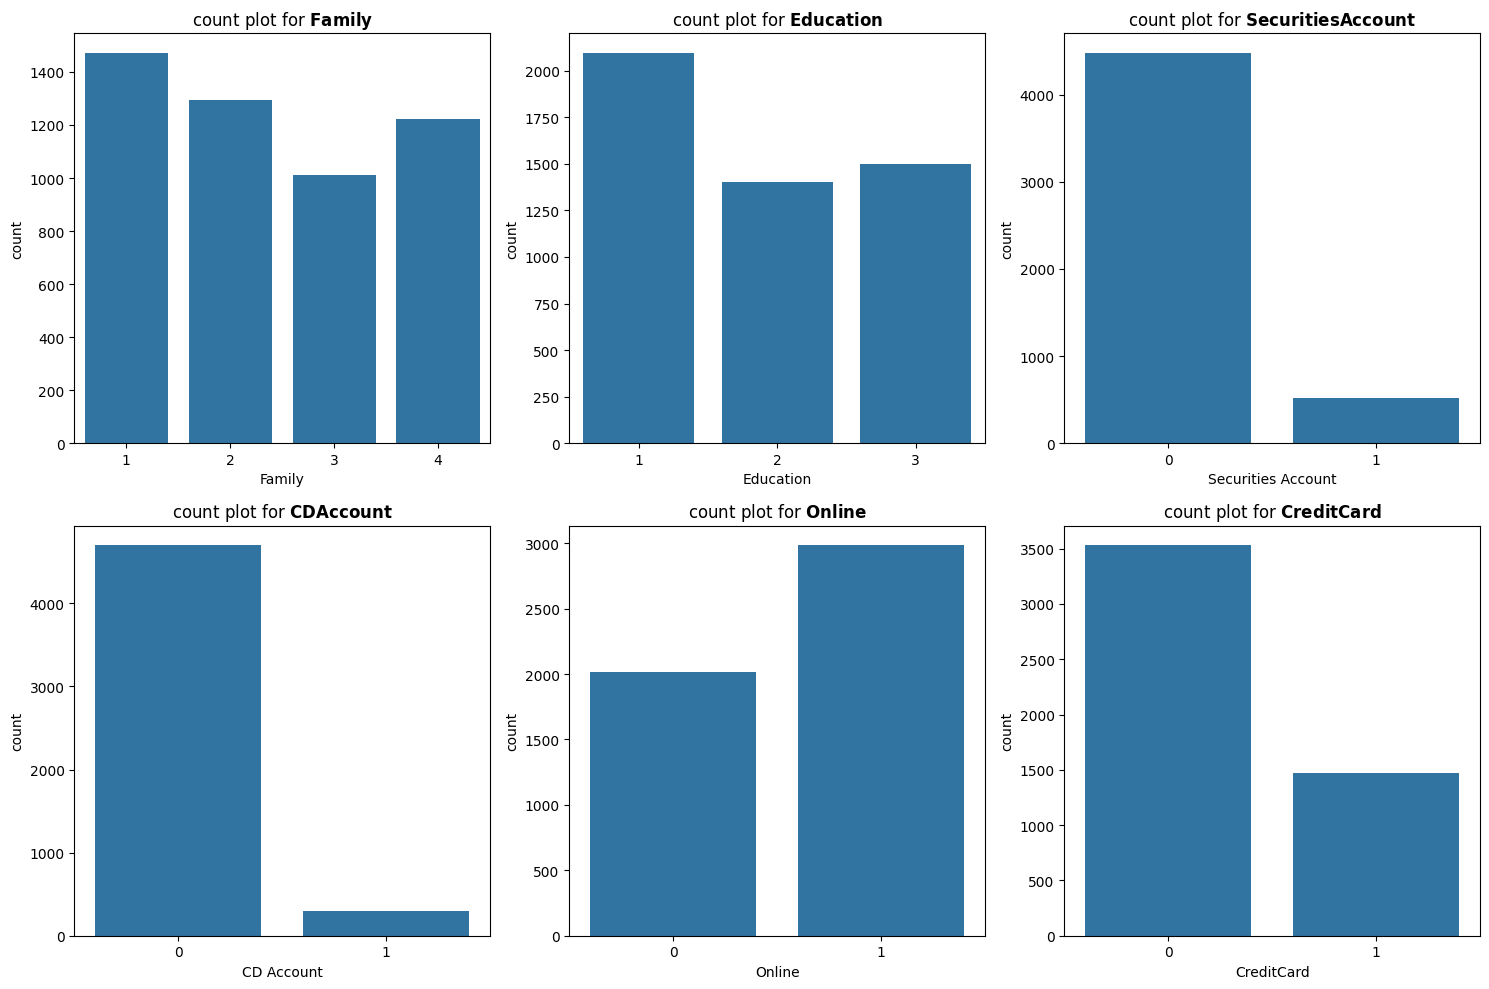

************************************************************************************************************************
Descrete columns name : 
 ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Descrete columns categories : 
 [[4, 3, 1, 2], [1, 2, 3], [1, 0], [0, 1], [0, 1], [0, 1]]
Descrete columns categories count : 
 [[1222, 1010, 1472, 1296], [2096, 1403, 1501], [522, 4478], [4698, 302], [2016, 2984], [3530, 1470]]


************************************************************************************************************************


In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"count plot for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()
#############################################################
descrete_cols_categories=[]
descrete_cols_categories_count=[]

for col in list(descrete_col.columns):
    pie_name1=[]
    pie_value1=[]
    for j in range(len(descrete_col[col].unique())) :
        pie_name1.append(descrete_col[col].unique()[j])
        pie_value1.append(descrete_col[descrete_col[col]==pie_name1[j]][col].count())
    descrete_cols_categories.append(pie_name1)
    descrete_cols_categories_count.append(pie_value1)

print('*'*120)
print('Descrete columns name : \n' , list(descrete_col.columns))
print('Descrete columns categories : \n' , descrete_cols_categories)
print('Descrete columns categories count : \n' , descrete_cols_categories_count)
print('\n')
print('*'*120)
#############################################################
rows = 3
cols = 2

# Create subplots
fig = make_subplots(rows=rows, cols=cols, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}],
                                           [{"type": "pie"}, {"type": "pie"}]])


for i in range(rows * cols) :
    fig.add_trace(go.Pie(labels=descrete_cols_categories[i], values=descrete_cols_categories_count[i], name=descrete_col.columns[i]),
                  row=int(np.ceil((i+1)/2)), col=(i%2)+1)


fig.update_layout(margin=dict(t=35, b=35, l=35, r=35))
fig.update(layout_title_text='Percent Of values in descrete columns',
           layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

Dapat dilihat pada grafik yaitu :
- dalam hal jumlah family, pelanggan dengan 1 orang keluarga memiliki jumlah pelanggan terbanyak (29,4% dari seluruh pelanggan) dan dengan 3 orang keluarga memiliki jumlah pelanggan paling sedikit (20,2% dari seluruh pelanggan).
- pada education, sebagian besar pelanggan adalah undergraduate (41,9%).
- Sebagian besar nasabah belum memiliki Securities Account(89,6%)
- Hanya sedikit pelanggan yang memiliki CD Account dan sebagian besar tidak memilikinya
- Lebih dari separuh pelanggan menggunakan Online services (59,7%)
- Hanya 29,4% pelanggan yang menggunakan credit card dan sebagian besar tidak menggunakannya

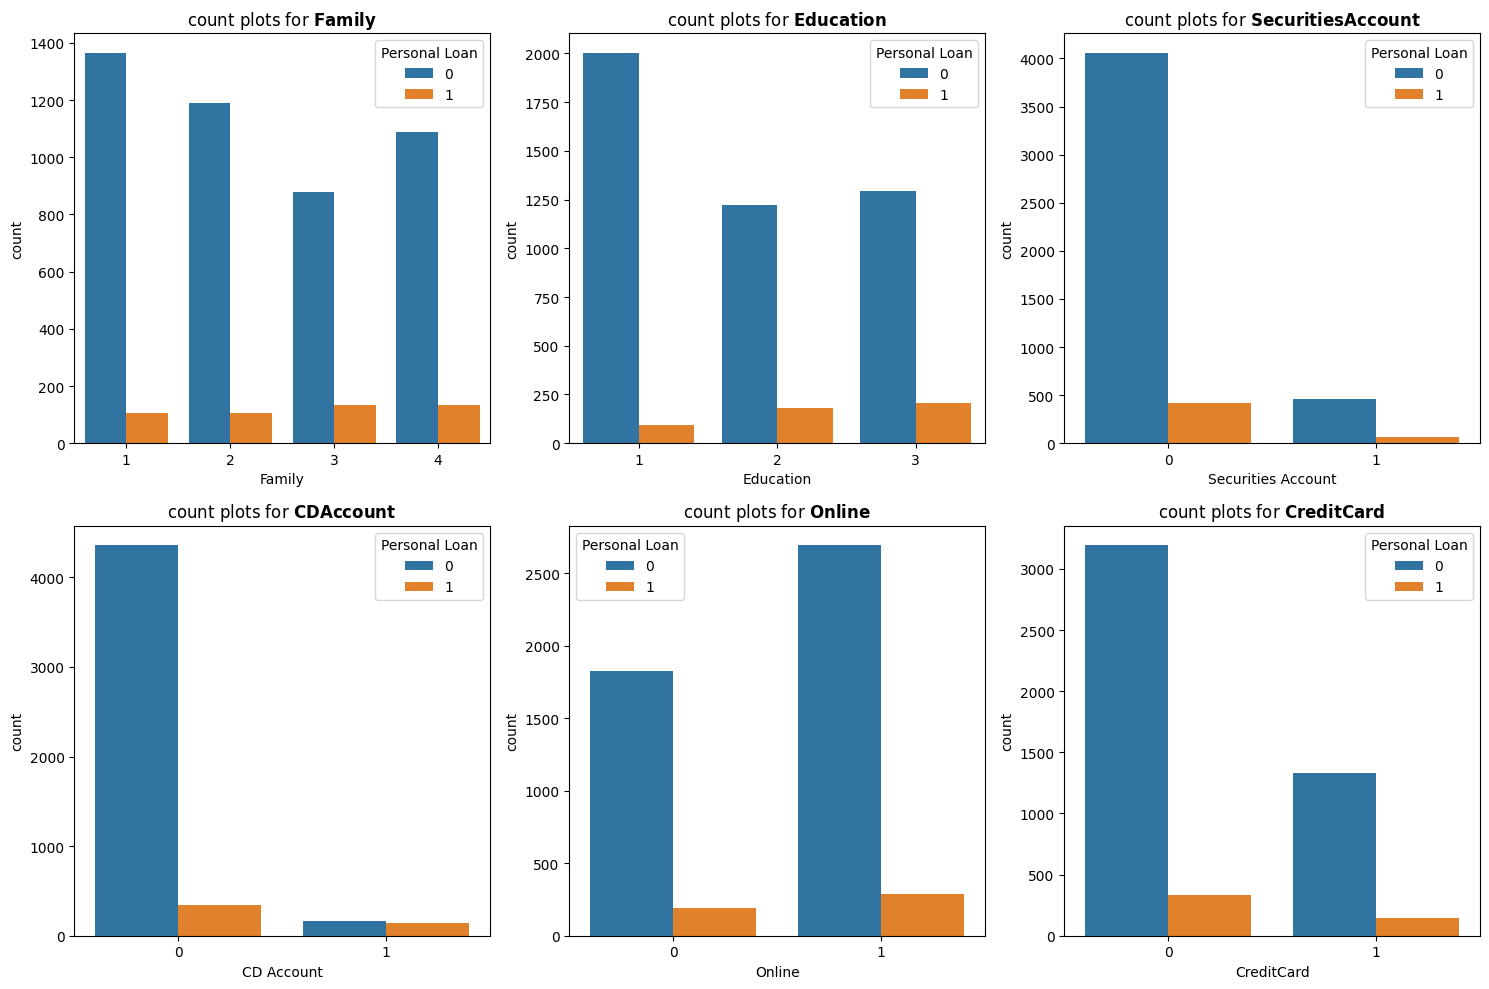

In [31]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col,hue='Personal Loan')
    plt.title(f"count plots for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()

Plot ini menunjukkan jumlah pelanggan yang diberikan pinjaman berdasarkan fitur khusus.
- sebagian besar nasabah adalah family dengan 1 orang, namun keluarga dengan 3 dan 4 orang mendapat pinjaman lebih banyak dibandingkan yang lain.
- education sebagian besar nasabah adalah undergraduate, namun nasabah graduate dan professional diberikan pinjaman lebih banyak dibandingkan yang lain.
- Sebagian besar nasabah yang diberi pinjaman tidak memiliki securities account, sehingga menyoroti pentingnya berbagai fitur dalam meningkatkan peluang diberikan pinjaman.
- Sebagian besar pelanggan yang diberikan pinjaman tidak memiliki CD Accounts.
- Kebanyakan nasabah yang diberi pinjaman tidak menggunakan Credit Card.
- Sebagian besar pelanggan yang diberikan pinjaman menggunakan Online services.

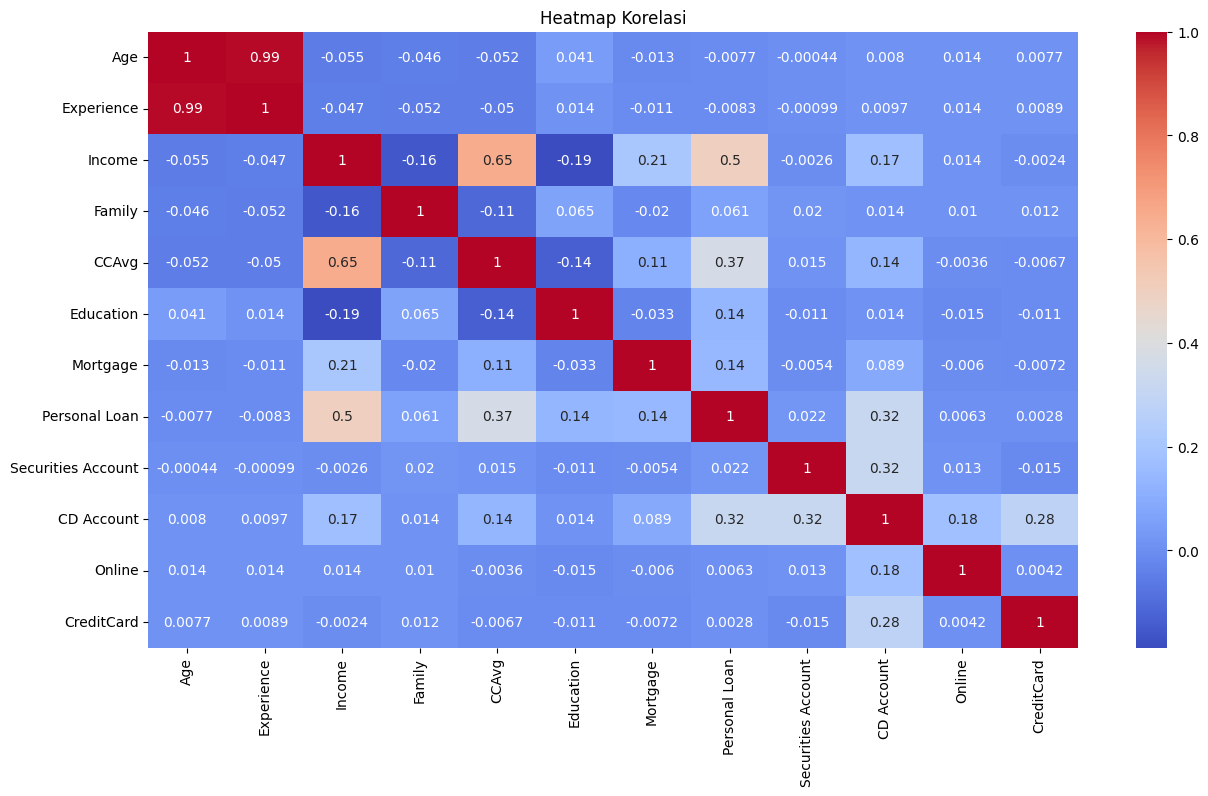

In [32]:
# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Menambahkan judul
plt.title('Heatmap Korelasi')

# Menampilkan heatmap
plt.show()

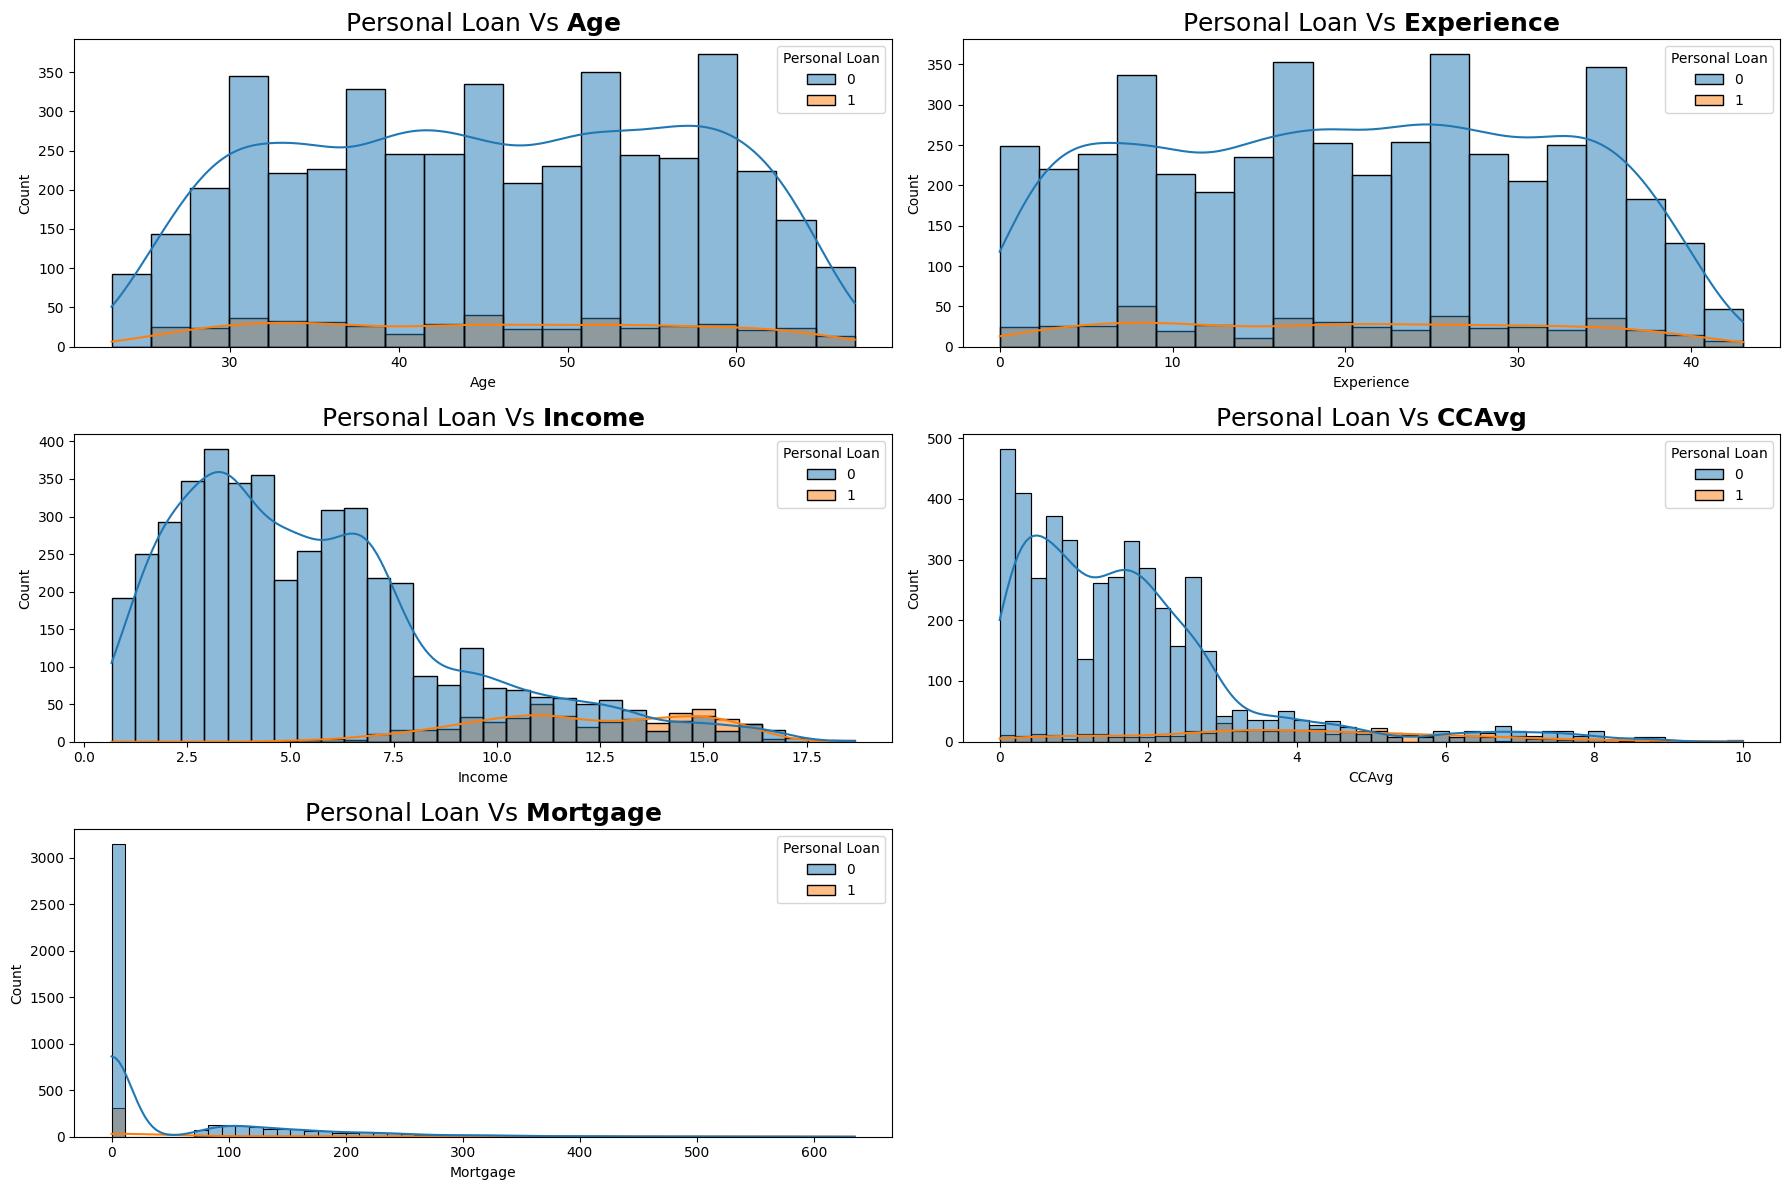



************************************************************************************************************************


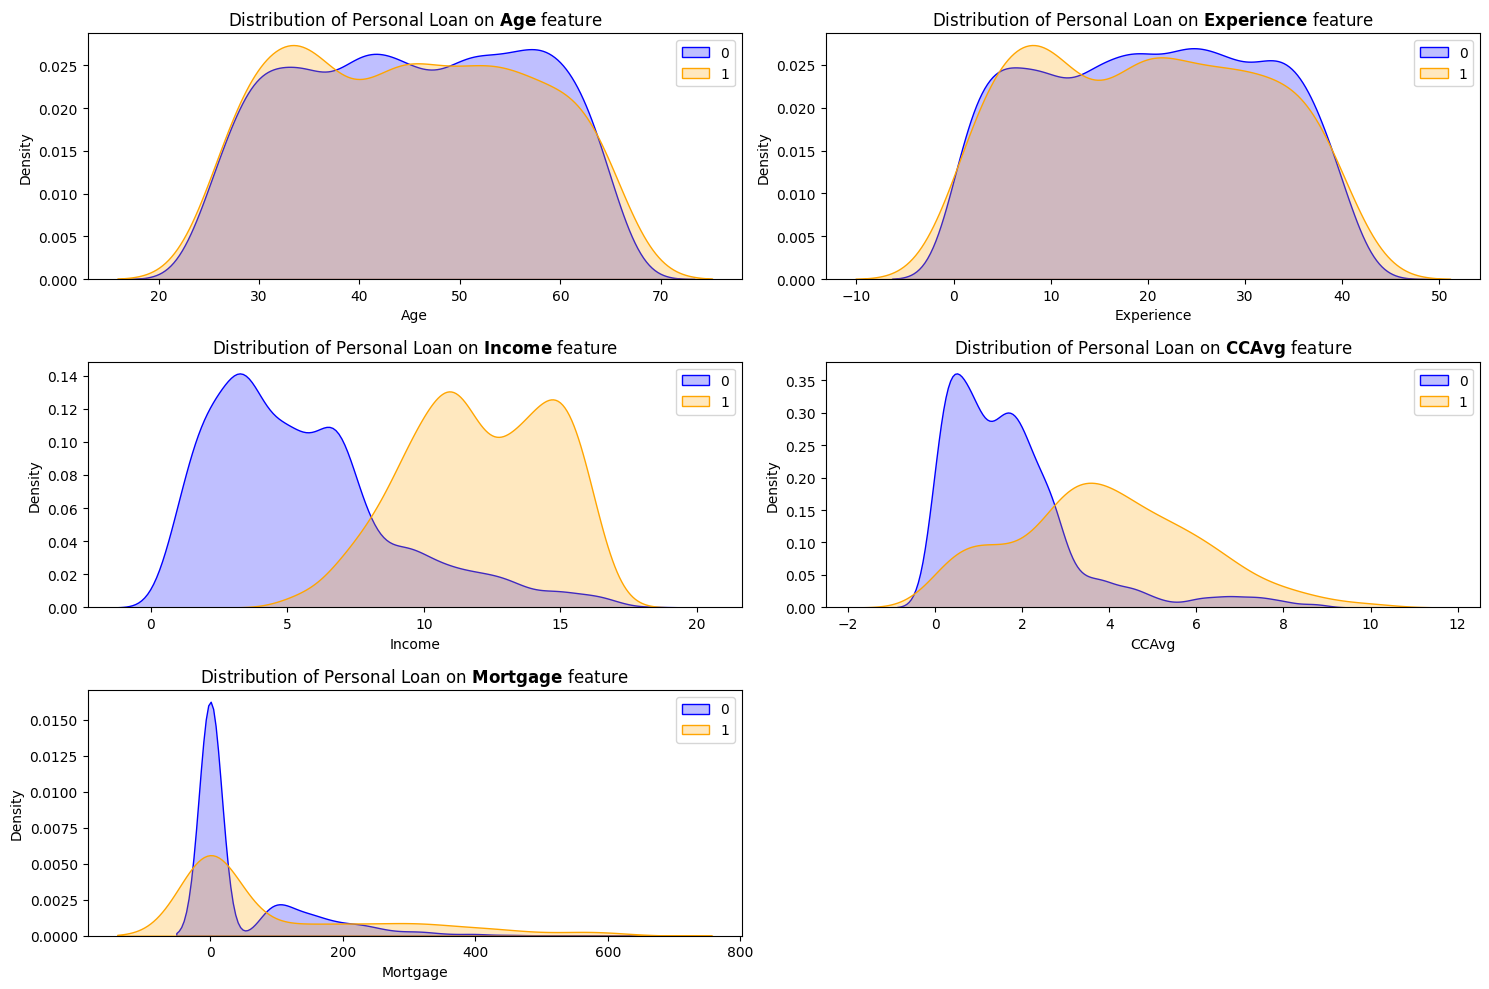

In [33]:
plt.figure(figsize=(18,12))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[col],hue = df['Personal Loan'],kde=True)
    plt.title(f"Personal Loan Vs $\\mathbf{{{col}}}$",fontsize=18)

plt.tight_layout()
plt.show()

#############################################################################
print('\n')
print('*'*120)

plt.figure(figsize=(15,10))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    color=['blue','orange']
    for j in list(df['Personal Loan'].unique()) :
        sns.kdeplot(df[df['Personal Loan']==j][col],color=color[j],fill=True,label=j)
        plt.legend()
    plt.title(f"Distribution of Personal Loan on $\\mathbf{{{col}}}$ feature")
plt.tight_layout()
plt.show()

Plot ini menunjukkan jumlah dan distribusi pelanggan berdasarkan fitur continuous
- Age nasabah yang diberi pinjaman adalah (26-65).
- Plot Experience menunjukkan bahwa pelanggan dengan jumlah pengalaman berapa pun dapat diberikan pinjaman.
- Kisaran Income nasabah yang diberi pinjaman adalah (5-17.5), sebagian besar nasabah yang menerima pinjaman memiliki pendapatan pada kisaran (7.5-16.5).
- plot Income kde dengan jelas menunjukkan bahwa peluang untuk mendapatkan pinjaman meningkat dengan meningkatnya pendapatan.
- Sebagian besar Pelanggan memiliki CCAvge <=3 (sekitar 83% dari seluruh pelanggan) sehingga di antara pelanggan tersebut 95,98% yang tidak diberikan pinjaman dan 4,02% diberikan, juga lebih sedikit pelanggan yang memiliki CCAvg >3 (sekitar 17% dari seluruh pelanggan) dibandingkan diantaranya 36,87% yang diberi pinjaman dan 63,13% tidak diberikan. Jadi, persentase ini menunjukkan bahwa nilai CCAvg yang besar meningkatkan peluang diberikan pinjaman.
- Sebagian besar pelanggan tidak memiliki mortgage apa pun (mortgage=0).

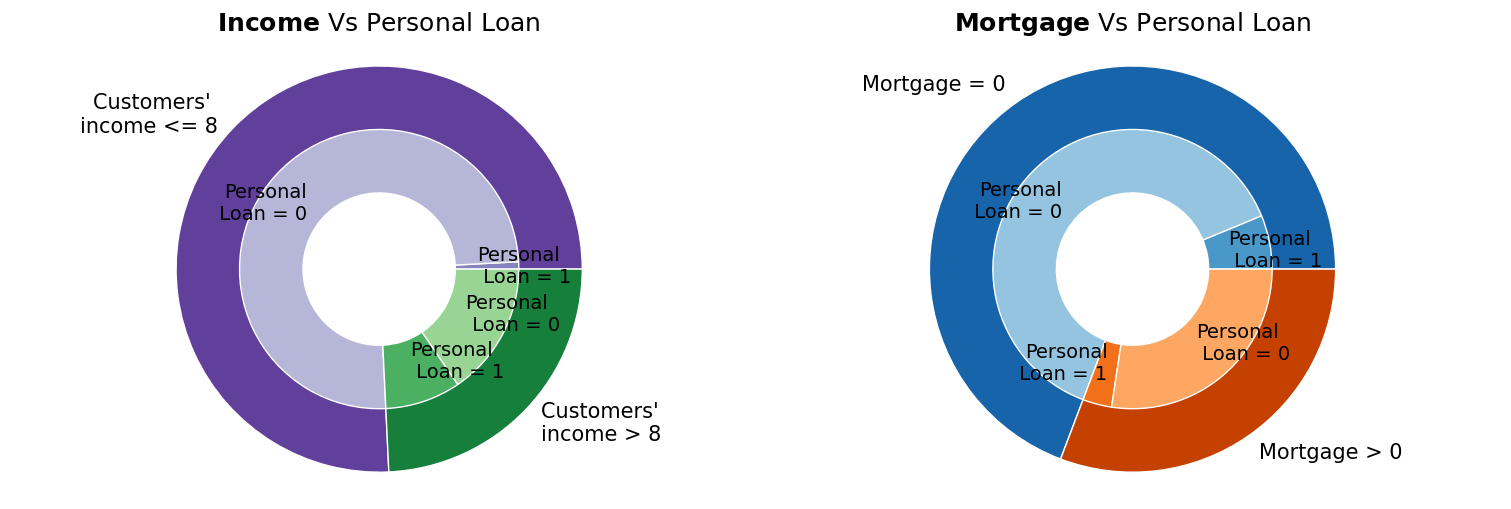



************************************************************************************************************************


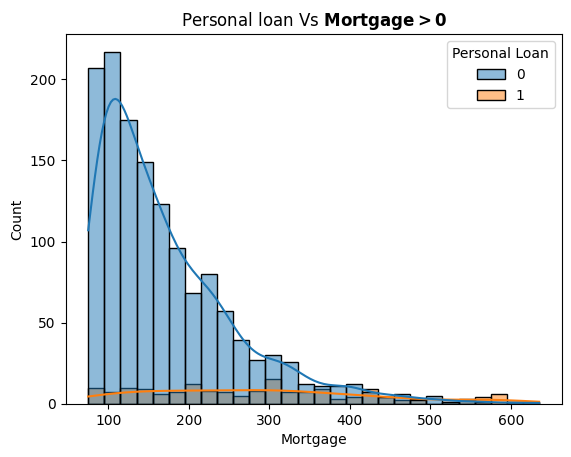

In [34]:
fig = plt.figure(figsize = (15,10),constrained_layout = True, dpi=100)
GridSpec = gridspec.GridSpec(ncols=1, nrows=2, figure= fig)

subfigure = fig.add_subfigure(GridSpec[0,:])
# Adding subplots to subfigure
subplots = subfigure.subplots(1,2)

total_names=[["Customers' \nincome <= 8", "Customers' \nincome > 8"],["Mortgage = 0", "Mortgage > 0"]]
total_size=[[3788,1212],[3462,1538]]
sub_names=["Personal\n Loan = 1","Personal\n Loan = 0","Personal\n Loan = 1","Personal\n Loan = 0"]
sub_size=[[42,3746,438,774],[312,3150,168,1370]]

# Create colors
c1, c2, c3, c4=[plt.cm.Purples, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]
colors = [[c1(0.8), c2(0.8)] ,[c1(0.6), c1(0.4), c2(0.6), c2(0.4)],[c3(0.8), c4(0.8)],[c3(0.6), c3(0.4), c4(0.6), c4(0.4)]]

for i,col in enumerate(['Income','Mortgage']):
    subplots[i].axis('equal')
    pie1, _ = subplots[i].pie(total_size[i], radius=0.8, labels=total_names[i],textprops={'fontsize': 15},
                              colors= colors[i*2])
    plt.setp( pie1, width=0.3, edgecolor='white')
    # Second Ring (Inside)
    pie2, _ = subplots[i].pie(sub_size[i], radius=0.85-0.3,
    labels=sub_names, labeldistance=0.7,textprops={'fontsize': 14}, colors=colors[i*2+1])
    plt.setp( pie2, width=0.25, edgecolor='white')
    plt.margins(0,0)
    subplots[i].set_title(f'$\\mathbf{{{col}}}$ Vs Personal Loan',fontsize=18)

plt.show()
#############################################################################
print('\n')
print('*'*120)

sns.histplot(x=df[df['Mortgage']>0]['Mortgage'],hue = df['Personal Loan'],kde=True)
plt.title(f'Personal loan Vs $\\mathbf{{{"Mortgage>0"}}}$')

plt.show()

- Seperti yang terlihat pada pieplot Income vs. Personal Loan, sebagian besar pelanggan memiliki pendapatan rendah <= 8 (sekitar 74,52% dari seluruh pelanggan), dan di antara pelanggan berpenghasilan rendah ini (0,91%) diberikan pinjaman tetapi yang lain (99,09% ) tidak. Selain itu, pada nasabah dengan pendapatan > 8 (sekitar 25,48% dari seluruh nasabah), 35% diberikan pinjaman, dan 65% lainnya tidak. Artinya, semakin banyak pendapatan dapat meningkatkan peluang diberikan pinjaman.
- Seperti yang terlihat pada histplot dan pieplot Mortgage, sebagian besar pelanggan tidak memiliki Mortgage apa pun (Mortgage = 0, sekitar 69,24% dari seluruh pelanggan) sehingga 9,01% dari pelanggan tersebut diberikan pinjaman dan 90,99% tidak. Artinya untuk mendapatkan pinjaman, Mortgage tidak diperlukan tetapi bermanfaat. pelanggan lainnya (30,76% dari seluruh pelanggan) memiliki Mortgage >= 75, 10,92% dari pelanggan ini diberikan pinjaman dan 89,08% lainnya tidak. Jadi, persentase tersebut menunjukkan bahwa semakin besar nilai hipotek dapat meningkatkan peluang diberikan pinjaman.

Pairplots of continuous features

<Figure size 800x500 with 0 Axes>

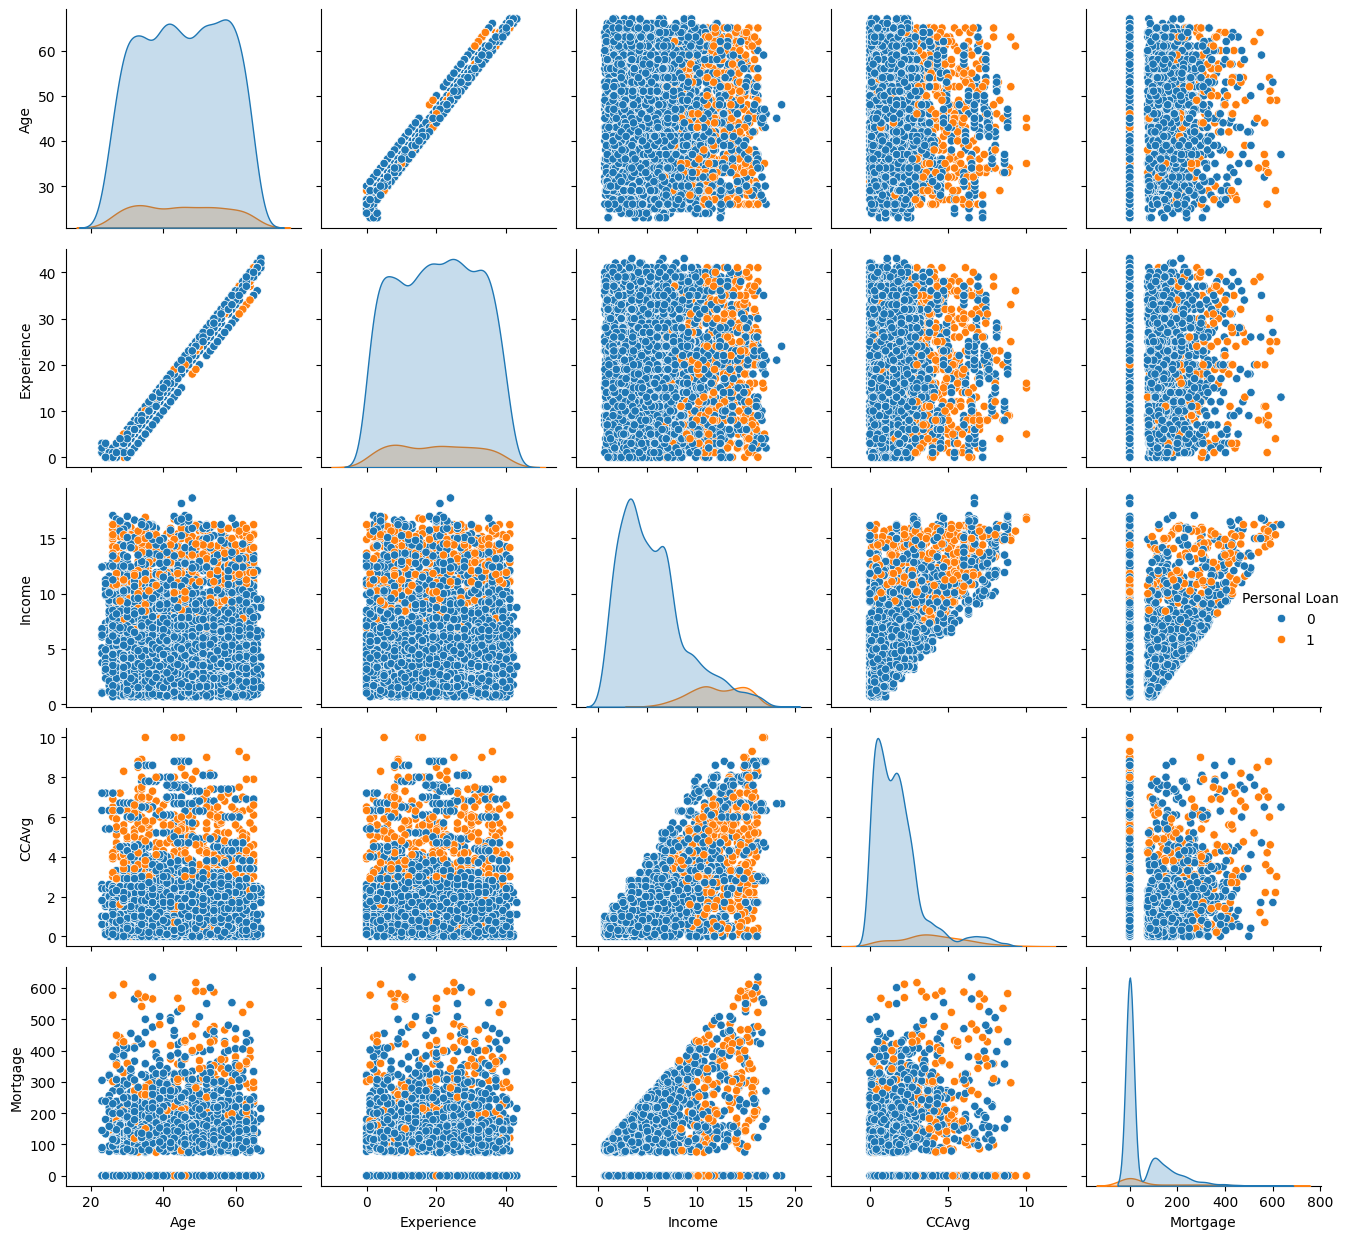

*****************************************************************************************************************************


In [35]:
plt.figure(figsize=(8,5))
sns.pairplot(df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']],hue='Personal Loan')
plt.tight_layout()
plt.show()
print('*'*125)

Personal Loan    Income     CCAvg  Mortgage
Personal Loan       1.000000  0.502462  0.366889  0.142095
Income              0.502462  1.000000  0.645984  0.206806
CCAvg               0.366889  0.645984  1.000000  0.109905
Mortgage            0.142095  0.206806  0.109905  1.000000

Income     CCAvg  Mortgage
Income    1.000000  0.645984  0.206806
CCAvg     0.645984  1.000000  0.109905
Mortgage  0.206806  0.109905  1.000000

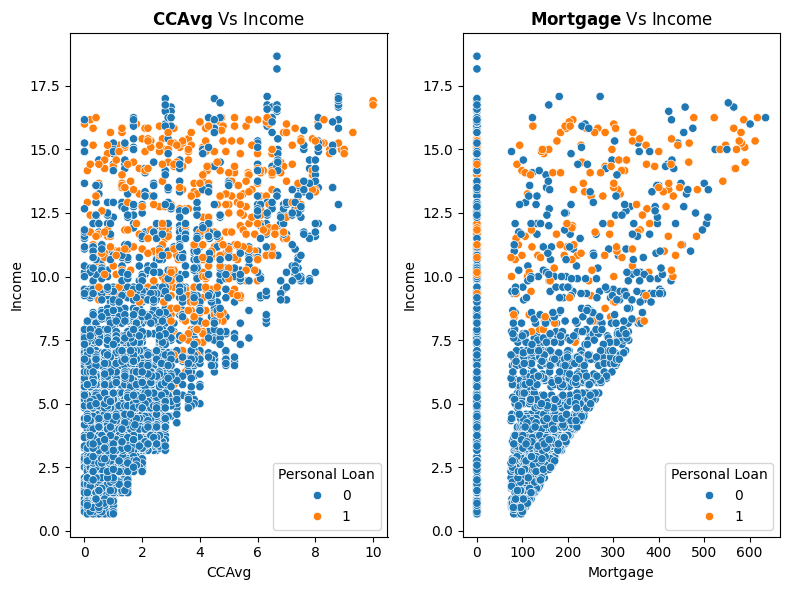

In [36]:
display(df[['Personal Loan','Income','CCAvg','Mortgage']].corr())
display(df[['Income','CCAvg','Mortgage']].corr())


plt.figure(figsize=(8,6))
for i,col in enumerate(['CCAvg','Mortgage']):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df, x=col,y='Income',hue='Personal Loan')
    plt.title(f"$\\mathbf{{{col}}}$ Vs Income")
plt.tight_layout()
plt.show()

Ketergantungan antara fitur continuous dan target

Income-Personal_Loan, CCAvg-Personal_Loan, Mortgage-Personal_Loan
- Dengan meningkatkan masing-masing Income, CCAvg and Mortgage, peluang untuk diberikan pinjaman dapat meningkat.

Ketergantungan antar fitur continuous

Mortgage-Income, CCAvg-Income
- Dengan meningkatkan Income, Mortgage and CCAvg dapat meningkat.

In [37]:
fig = px.scatter_3d(df, x='CCAvg', y='Income', z='CD Account',
              color='Personal Loan')
fig.show()
####################################################################
fig = px.scatter_3d(df, x='Mortgage', y='Income', z='CD Account',
              color='Personal Loan')
fig.show()

3D plots of Income-Mortgage-CD_Account and Income-CCAvg-CD_Account

- Seperti terlihat di atas, rasio jumlah titik kuning di level atas (CD Account = 1) lebih tinggi dibandingkan rasio jumlah titik kuning di level bawah (CD Account = 0), dan hal tersebut menunjukkan bahwa pelanggan dengan CD Account = 1 mempunyai peluang besar untuk diberikan pinjaman. (rasio tingkat atas = jumlah titik kuning di tingkat atas/jumlah semua titik di tingkat atas)
- Dari "income = 8" jumlah titik kuning (Personal Loan=1) lebih banyak dibandingkan titik biru.

Ketergantungan antara fitur Descrete dan target

CD account-Personal_Loan
- pelanggan memiliki CD account dapat meningkatkan peluang diberikan pinjaman.

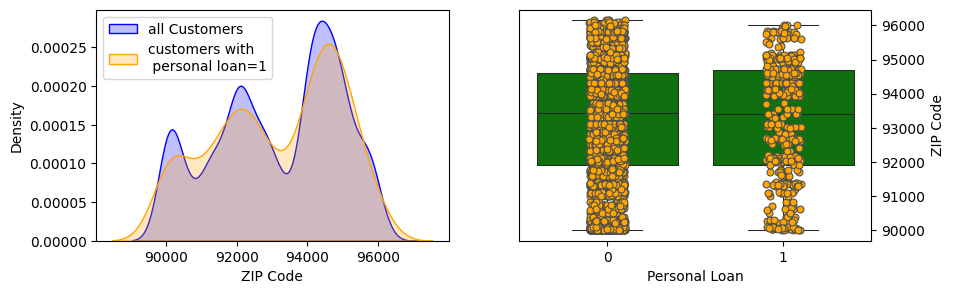

In [38]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.kdeplot(df1['ZIP Code'],fill=True,color='blue',label='all Customers')
sns.kdeplot(df1[df1['Personal Loan']==1]['ZIP Code'],fill=True,color='orange',label='customers with\n personal loan=1')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
ax = sns.boxplot(y=df1['ZIP Code'],x=df1['Personal Loan'],color="green", linewidth=0.75)
ax = sns.stripplot(y=df1['ZIP Code'],x=df1['Personal Loan'],color="orange",linewidth=0.75)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

- Seperti terlihat pada plot berikut, jumlah nasabah yang diberi pinjaman di berbagai lokasi (ZIP Code berbeda) sebanding dengan jumlah (atau sebaran) seluruh nasabah di lokasi tersebut. Selain itu, kami melihat bahwa pelanggan di lokasi berbeda dapat diberikan pinjaman.

In [39]:
fig = px.scatter_mapbox(
    df1 ,
    lat="Lat",
    lon="Lon",
    hover_name="County",
    color = "Personal Loan",
    color_continuous_scale = ["crimson",'darkblue'],
    hover_data=['Place','Income' , 'Mortgage' , "CreditCard"],
    zoom=10,
    height=400

)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -200, "east": 80, "south": -20, "north": 90})
fig.show()

- Kami melihat bahwa jumlah pelanggan di beberapa negara, seperti 'Los Angeles', 'San Diego', 'Santa Clara', dan 'Almeda', lebih tinggi dibandingkan negara lain di California. Selain itu, jumlah pelanggan yang diberikan pinjaman di negara-negara ini lebih tinggi dibandingkan negara lain.

Cek Data yang akan digunakan untuk pembuatan Model Machine Learning

In [40]:
df

Age  Experience    Income  Family  CCAvg  Education  Mortgage  \
0      25           1  4.083333       4    1.6          1         0   
1      45          19  2.833333       3    1.5          1         0   
2      39          15  0.916667       1    1.0          1         0   
3      35           9  8.333333       1    2.7          2         0   
4      35           8  3.750000       4    1.0          2         0   
...   ...         ...       ...     ...    ...        ...       ...   
4995   29           3  3.333333       1    1.9          3         0   
4996   30           4  1.250000       4    0.4          1        85   
4997   63          39  2.000000       2    0.3          3         0   
4998   65          40  4.083333       3    0.5          2         0   
4999   28           4  6.916667       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

# Model Training | Pelatihan Model

In [41]:
X = df.drop(columns=["Personal Loan"])
y = df["Personal Loan"]

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
X_res, y_res = SMOTE().fit_resample(X,y)

Selanjutnya melakukan oversampling pada dataset yang tidak seimbang (imbalanced dataset) menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique).

In [44]:
y_res.value_counts()

Personal Loan
0    4520
1    4520
Name: count, dtype: int64

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [46]:
print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of X_train is: (7232, 11)
Shape of X_test is:  (1808, 11)
Shape of y_train is: (7232,)
Shape of y_test is:  (1808,)


### Standardize Features

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Evaluation | Evaluasi Model

### 1. K-Nearest Neighbors (KNN)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred1 = knn_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9629424778761062
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       933
           1       0.95      0.98      0.96       875

    accuracy                           0.96      1808
   macro avg       0.96      0.96      0.96      1808
weighted avg       0.96      0.96      0.96      1808

Confusion Matrix:
[[885  48]
 [ 19 856]]


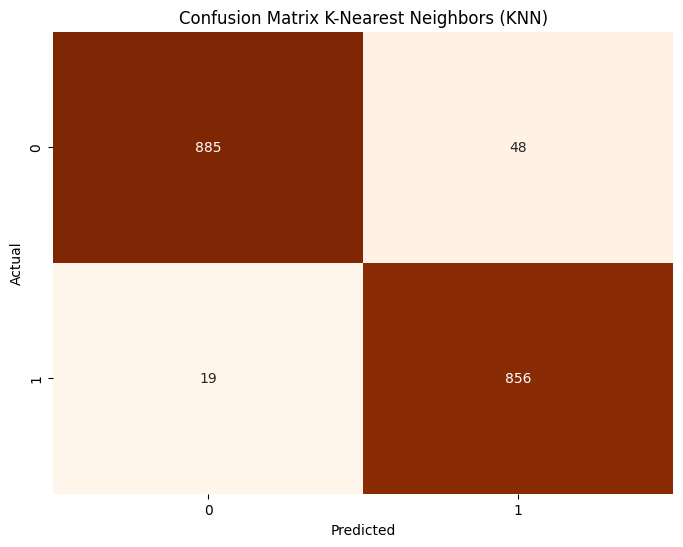

In [51]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2. Xgboost

In [53]:
# Import Library
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membagi data menjadi fitur (X) dan label (y)
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk memberikan bobot pada fitur berdasarkan rentang nilai
def assign_weights(df):
    weights = np.ones(df.shape)

    # Age
    age_idx = df.columns.get_loc('Age')
    weights[:, age_idx] = np.where((df['Age'] >= 17) & (df['Age'] <= 40), 2.0, weights[:, age_idx])
    weights[:, age_idx] = np.where((df['Age'] > 40) & (df['Age'] <= 60), 1.5, weights[:, age_idx])
    weights[:, age_idx] = np.where(df['Age'] > 60, 1.0, weights[:, age_idx])

    # Income
    income_idx = df.columns.get_loc('Income')
    weights[:, income_idx] = np.where((df['Income'] >= 0) & (df['Income'] <= 50000000), 1.0, weights[:, income_idx])
    weights[:, income_idx] = np.where((df['Income'] > 50000000) & (df['Income'] <= 100000000), 1.5, weights[:, income_idx])
    weights[:, income_idx] = np.where(df['Income'] > 100000000, 2.0, weights[:, income_idx])

    # CCavg
    ccavg_idx = df.columns.get_loc('CCAvg')
    weights[:, ccavg_idx] = np.where((df['CCAvg'] >= 0) & (df['CCAvg'] <= 50000000), 2.0, weights[:, ccavg_idx])
    weights[:, ccavg_idx] = np.where((df['CCAvg'] > 50000000) & (df['CCAvg'] <= 100000000), 1.5, weights[:, ccavg_idx])
    weights[:, ccavg_idx] = np.where(df['CCAvg'] > 100000000, 1.0, weights[:, ccavg_idx])

    # Family
    family_idx = df.columns.get_loc('Family')
    weights[:, family_idx] = np.where((df['Family'] >= 1) & (df['Family'] <= 3), 2.0, weights[:, family_idx])
    weights[:, family_idx] = np.where((df['Family'] > 3) & (df['Family'] <= 5), 1.5, weights[:, family_idx])
    weights[:, family_idx] = np.where(df['Family'] > 6, 1.0, weights[:, family_idx])

    # Education
    education_idx = df.columns.get_loc('Education')
    weights[:, education_idx] = np.where(df['Education'] == 1, 1.0, weights[:, education_idx])
    weights[:, education_idx] = np.where(df['Education'] == 2, 1.5, weights[:, education_idx])
    weights[:, education_idx] = np.where(df['Education'] == 3, 2.0, weights[:, education_idx])

    # Mortgage
    mortgage_idx = df.columns.get_loc('Mortgage')
    weights[:, mortgage_idx] = np.where((df['Mortgage'] >= 0) & (df['Mortgage'] <= 50000000), 1.0, weights[:, mortgage_idx])
    weights[:, mortgage_idx] = np.where((df['Mortgage'] > 50000000) & (df['Mortgage'] <= 100000000), 1.5, weights[:, mortgage_idx])
    weights[:, mortgage_idx] = np.where(df['Mortgage'] > 100000000, 2.0, weights[:, mortgage_idx])

    # Experience
    experience_idx = df.columns.get_loc('Experience')
    weights[:, experience_idx] = np.where((df['Experience'] >= 0) & (df['Experience'] <= 5), 1.0, weights[:, experience_idx])
    weights[:, experience_idx] = np.where((df['Experience'] > 5) & (df['Experience'] <= 10), 1.2, weights[:, experience_idx])
    weights[:, experience_idx] = np.where((df['Experience'] > 10) & (df['Experience'] <= 15), 1.5, weights[:, experience_idx])
    weights[:, experience_idx] = np.where((df['Experience'] > 15) & (df['Experience'] <= 20), 1.8, weights[:, experience_idx])
    weights[:, experience_idx] = np.where(df['Experience'] > 20, 2.0, weights[:, experience_idx])

    # Securities Account
    sec_account_idx = df.columns.get_loc('Securities Account')
    weights[:, sec_account_idx] = np.where(df['Securities Account'] == 0, 1.0, weights[:, sec_account_idx])
    weights[:, sec_account_idx] = np.where(df['Securities Account'] == 1, 2.0, weights[:, sec_account_idx])

    # CD Account
    cd_account_idx = df.columns.get_loc('CD Account')
    weights[:, cd_account_idx] = np.where(df['CD Account'] == 0, 1.0, weights[:, cd_account_idx])
    weights[:, cd_account_idx] = np.where(df['CD Account'] == 1, 2.0, weights[:, cd_account_idx])

    # Online
    online_idx = df.columns.get_loc('Online')
    weights[:, online_idx] = np.where(df['Online'] == 0, 1.0, weights[:, online_idx])
    weights[:, online_idx] = np.where(df['Online'] == 1, 2.0, weights[:, online_idx])

    # CreditCard
    credit_card_idx = df.columns.get_loc('CreditCard')
    weights[:, credit_card_idx] = np.where(df['CreditCard'] == 0, 1.0, weights[:, credit_card_idx])
    weights[:, credit_card_idx] = np.where(df['CreditCard'] == 1, 2.0, weights[:, credit_card_idx])

    return weights

# Menerapkan pembobotan fitur pada data pelatihan dan pengujian
X_train_weights = assign_weights(X_train)
X_test_weights = assign_weights(X_test)

# Inisialisasi dan latih model XGBoost
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train, sample_weight=X_train_weights.mean(axis=1))

# Membuat prediksi pada data uji
y_pred2 = model_xgb.predict(X_test)

In [54]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix_xgb)


Accuracy: 0.993
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.98      0.95      0.97       105

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
[[893   2]
 [  5 100]]


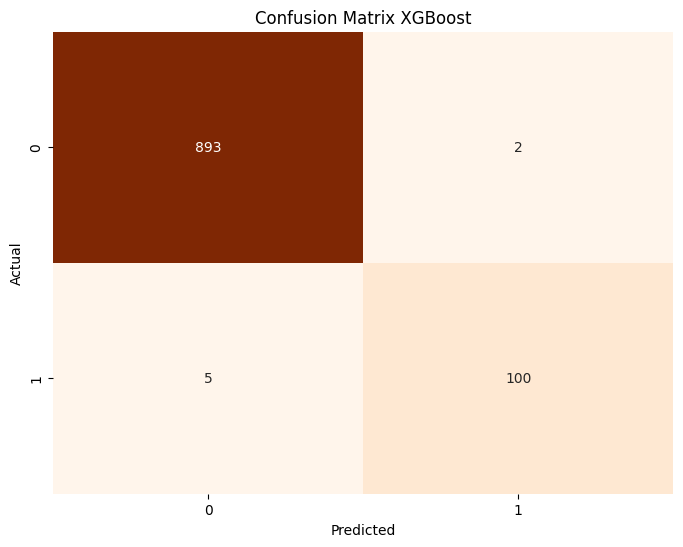

In [55]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.title('Confusion Matrix XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 3. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred3 = dt_model.predict(X_test)

In [57]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.988
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.93      0.94       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
[[890   5]
 [  7  98]]


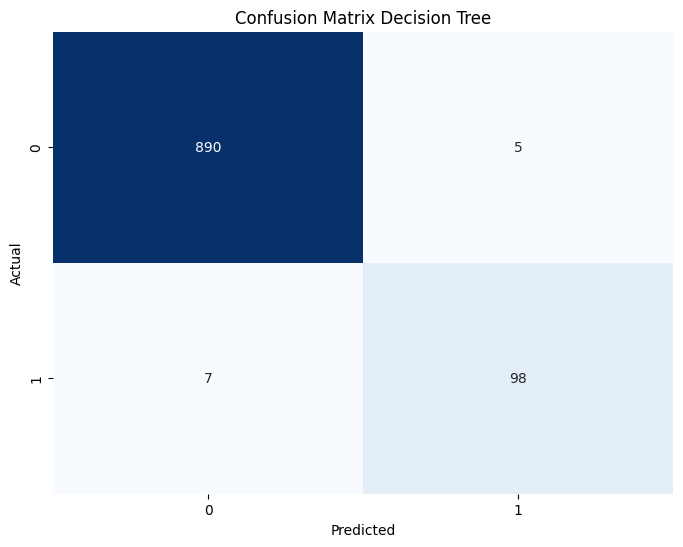

In [58]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Kesimpulan
Dapat dilihat dari tabel diatas perbandingan diantara ketiga model tersebut, **Xgboost** adalah model terbaik dengan metrik berikut:
- **Akurasi tertinggi** sebesar 0.978982
- **Presisi tertinggi** sebesar 0.978286

Oleh karena itu, model **Xgboost** dapat dianggap sebagai model terbaik di antara ketiganya berdasarkan metrik akurasi dan presisi yang telah diberikan.

In [62]:
import joblib

# save model with joblib
filename = 'model_xgb.sav'
joblib.dump(model_xgb, filename)
print(f"Model saved to {filename}")

Model saved to model_xgb.sav


In [64]:
filtered_df = df[df['Personal Loan'] == 0]
filtered_df

Age  Experience    Income  Family  CCAvg  Education  Mortgage  \
0      25           1  4.083333       4    1.6          1         0   
1      45          19  2.833333       3    1.5          1         0   
2      39          15  0.916667       1    1.0          1         0   
3      35           9  8.333333       1    2.7          2         0   
4      35           8  3.750000       4    1.0          2         0   
...   ...         ...       ...     ...    ...        ...       ...   
4995   29           3  3.333333       1    1.9          3         0   
4996   30           4  1.250000       4    0.4          1        85   
4997   63          39  2.000000       2    0.3          3         0   
4998   65          40  4.083333       3    0.5          2         0   
4999   28           4  6.916667       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4520 rows x 12 columns]

In [65]:
df.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600     6.147850     2.396400     1.937938   
std      11.463166    11.415189     3.836144     1.147663     1.747659   
min      23.000000     0.000000     0.666667     1.000000     0.000000   
25%      35.000000    10.000000     3.250000     1.000000     0.700000   
50%      45.000000    20.000000     5.333333     2.000000     1.500000   
75%      55.000000    30.000000     8.166667     3.000000     2.500000   
max      67.000000    43.000000    18.666667     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000